# Run script to generate figure data

In [33]:
%%sh
./run.sh

  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

Problem configuration complete.
Found Accelergy ERT (energy reference table), replacing internal energy model.
Found Accelergy ART (area reference table), replacing internal area model.
Architecture configuration complete.
Sparse optimization configuration complete.
Using threads = 1
Mapper configuration complete.
Initializing Index Factorization subspace.
  Factorization options along problem dimension M = 1
  Factorization options along problem dimension N = 1
  Factorization options along problem dimension K = 1
Mapspace Dimension [IndexFactorization] Size: 1
Mapspace Dimension [LoopPermutation] Size: 1
Mapspace Dimension [Spatial] Size: 1
Mapspace Dimension [DatatypeBypass] Size: 1
Mapspace split! Per-split Mapping Dimens

mkdir: cannot create directory ‘../output_0.01_coo’: File exists
MESSAGE: attempting to read problem shape from file: /home/git_clones/timeloop-dev/timeloop/problem-shapes/gemm-ABZ.yaml
[  0] Utilization = 0.01 | pJ/Algorithmic-Compute =    0.044 | pJ/Compute =  317.312 | L2[ABZ] N128 M128 - L1[AB] K1 - L0[Z] K128 
[  0] STATEMENT: search algorithm is done, terminating search.
mkdir: cannot create directory ‘../output_0.01_bitmask’: File exists
MESSAGE: attempting to read problem shape from file: /home/git_clones/timeloop-dev/timeloop/problem-shapes/gemm-ABZ.yaml
[  0] Utilization = 0.00 | pJ/Algorithmic-Compute =    0.083 | pJ/Compute =  604.937 | L2[ABZ] N128 M128 - L1[AB] K1 - L0[Z] K128 
[  0] STATEMENT: search algorithm is done, terminating search.
mkdir: cannot create directory ‘../output_0.01_bitmask.skip’: File exists
MESSAGE: attempting to read problem shape from file: /home/git_clones/timeloop-dev/timeloop/problem-shapes/gemm-ABZ.yaml
[  0] Utilization = 0.00 | pJ/Algorithmic

# Load result data

In [34]:
from parse_timeloop_output import *

sparse_setups = ["coo", "bitmask", "bitmask.skip"]

densities = [0.01, 0.02, 0.04, 0.08, 0.1, 0.2, 0.4, 0.8]

metrics_v_density = {sparse_setup:{} for sparse_setup in sparse_setups}

for d in densities:
    for sparse_setup in sparse_setups:
        out_dir_name="output_" + str(d) + "_" + sparse_setup
        metrics_v_density[sparse_setup][str(d)] = parse_timeloop_stats("../" + out_dir_name + "/timeloop-mapper.map+stats.xml")

In [51]:
(metrics_v_density["coo"]["0.8"]["energy_breakdown_pJ"]["MAC"]["energy"]
+ metrics_v_density["coo"]["0.8"]["energy_breakdown_pJ"]["Reg"]["energy"]
+ metrics_v_density["coo"]["0.8"]["energy_breakdown_pJ"]["Buffer"]["energy"]
+ metrics_v_density["coo"]["0.8"]["energy_breakdown_pJ"]["BackingStorage"]["energy"])/1000000.0

11.477344031915182

# Plot result data

In [19]:
eff_v_density_coo = [1.0/metrics_v_density["coo"][str(d)]["energy_pJ"] for d in densities]
eff_v_density_coo_norm = [1.0 for eff in eff_v_density_coo]
eff_v_density_bitmask = [1.0/metrics_v_density["bitmask"][str(d)]["energy_pJ"] for d in densities]
eff_v_density_bitmask_norm = [eff_v_density_bitmask[idx]/eff_v_density_coo[idx] for idx in range(len(densities))]
eff_v_density_bitmask_skip = [1.0/metrics_v_density["bitmask.skip"][str(d)]["energy_pJ"] for d in densities]
eff_v_density_bitmask_skip_norm = [eff_v_density_bitmask_skip[idx]/eff_v_density_coo[idx] for idx in range(len(densities))]

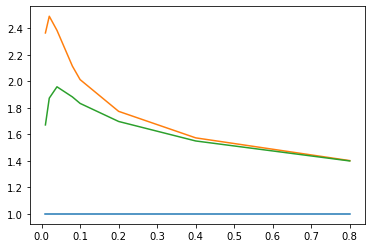

In [20]:
import matplotlib.pyplot as plt

plt.plot(densities,eff_v_density_coo_norm)
plt.plot(densities,eff_v_density_bitmask_norm)
plt.plot(densities,eff_v_density_bitmask_skip_norm)

In [22]:
speed_v_density_coo = [1.0/float(metrics_v_density["coo"][str(d)]["cycles"]) for d in densities]
speed_v_density_coo_norm = [1.0 for eff in speed_v_density_coo]
speed_v_density_bitmask = [1.0/float(metrics_v_density["bitmask"][str(d)]["cycles"]) for d in densities]
speed_v_density_bitmask_norm = [speed_v_density_bitmask[idx]/speed_v_density_coo[idx] for idx in range(len(densities))]
speed_v_density_bitmask_skip = [1.0/float(metrics_v_density["bitmask.skip"][str(d)]["cycles"]) for d in densities]
speed_v_density_bitmask_skip_norm = [speed_v_density_bitmask_skip[idx]/speed_v_density_coo[idx] for idx in range(len(densities))]

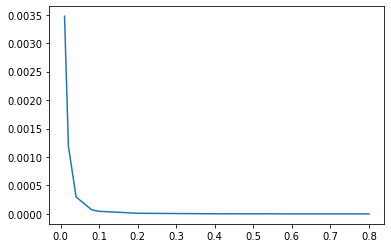

In [29]:
import matplotlib.pyplot as plt

#plt.plot(densities,speed_v_density_coo)
plt.plot(densities,speed_v_density_bitmask_skip)
#plt.plot(densities,speed_v_density_bitmask_skip_norm)